# Work on 9th August, 2021 - Tuesday

* <a href="#-Creating-Dataframes"> Creating Dataframes</a>
    * <a href="Creating Dataframes via lists"> Creating Dataframes via lists</a>
    * <a href="Creating Dataframes via files"> Creating Dataframes via files</a>

* <a href="Accessing Rows and Columns to a Dataset"> Accessing Rows and Columns to a Dataset</a>
* <a href="Adding extra Rows and Columns to the dataframe">Adding extra Rows and Columns to the dataframe</a>
* <a href="Deleting rows and columns">Deleting rows and columns</a>
* <a href="Manipulating Rows">Manipulating Rows</a>
    * <a href="Manipulating Rows -- Understanding the factor issue">Manipulating Rows -- Understanding the factor issue</a>
    * <a href="#Manipulating-rows----with-resolve-of-factor-issue">Manipulating rows -- with resolve of factor issue</a>

In [ ]:
Work on 19th August, 2021 - Thursday


# <id name="Creating Dataframes"> Creating Dataframes</a>

## Creating Dataframes via lists

## Creating Dataframes via files

syntax: `dataframe = read.table(path="<path>", sep)`

In [63]:
dataframe = read.table("test.csv", sep=",", header = 1)

In [64]:
dataframe

GadgetName,Category,Price
Mouse,Electronics,250
Key Board,Electronics,300
UPS,Electrical,1000
Switch Board,Electrical,200
Mobile Phone,Electronics,10000


## Accessing Rows and Columns to a Dataset

`df[row1, col1]` refers element which corresponds to row **row1** and column **col1** -- Can be number(Index) or string.
<br/>
**row1** or **col1** can also be array of values like **`1:3`** or **`c(1, 4)`**.
<br/>

Let's access element in first_row and 2nd column -- should result `"Electronics"`

In [11]:
dataframe[1,2]

[1]  Electronics
Levels:  Electrical  Electronics

Let's try accessing the value `200` in the column_3, row_4

In [12]:
dataframe[4, 3]

[1] 200

Let's try accessing the 2nd and 3rd rows

In [13]:
dataframe[2:3, ]   # "Column_field", empty connotates that, take all the columns presetnt..             (WITH Comma)

,GadgetName,Category,Price
2,Key Board,Electronics,300
3,UPS,Electrical,1000


Let's try accessing the columns 1st and 2nd

In [15]:
dataframe[ , 1:2] # "Row_field" empty connotates that, take all the available rows..                     (WITH Comma)

GadgetName,Category
Mouse,Electronics
Key Board,Electronics
UPS,Electrical
Switch Board,Electrical
Mobile Phone,Electronics


This time, lets take 2nd, 3rd, 4th rows and 1st, 2nd columns..

In [18]:
dataframe[2:4, 1:2]

,GadgetName,Category
2,Key Board,Electronics
3,UPS,Electrical
4,Switch Board,Electrical


In [28]:
dataframe['GadgetName']  # Only one value, tells to take only that specific column with all the available rows. (WITHOUT comma)

GadgetName
Mouse
Key Board
UPS
Switch Board
Mobile Phone


**How to access particular set of rows?**
<br/>
Have a list of those rows..and use as below..

In [30]:
dataframe[c(1, 3, 4), ]

,GadgetName,Category,Price
1,Mouse,Electronics,250
3,UPS,Electrical,1000
4,Switch Board,Electrical,200


**How to get certain instances(rows) based on certain condition?**
<br/>
use `subset()`

#### Subset

To extract a subset of data based on certain conditions

Get the instance of the gadget `UPS`..

In [31]:
subset(dataframe, GadgetName=="UPS")

,GadgetName,Category,Price
3,UPS,Electrical,1000


Get the instances which has **price** of **electrical** goods **>200**

In [51]:
subset(dataframe, Category=="Electrical")  # WHY NOT WORKING....................???????????

GadgetName,Category,Price


subset(dataframe, Price>200)

In [56]:
subset(dataframe, Price>200 | Category=="Electrical")

,GadgetName,Category,Price
1,Mouse,Electronics,250
2,Key Board,Electronics,300
3,UPS,Electrical,1000
5,Mobile Phone,Electronics,10000


#### Editing dataframes *(GUI way)*  
<br/>
Tested in RStudio

In [57]:
table = data.frame() # Create the instance of DataFrame..
table = edit(table) # Now a table gets opened... enter the data and quit the window ... that's it values gets stored as dataframe.

ERROR: Error in edit(table): ‘edit()’ not yet supported in the Jupyter R kernel


Can also be used for existing dataframes...

## Adding extra Rows and Columns to the dataframe

#### `rbind()` -  Adding extra rows..

In [67]:
rbind(dataframe, data.frame(GadgetName="Pen", Category="Stationary", Price=5))

GadgetName,Category,Price
Mouse,Electronics,250
Key Board,Electronics,300
UPS,Electrical,1000
Switch Board,Electrical,200
Mobile Phone,Electronics,10000
Pen,Stationary,5


#### `cbind()` - Adding Extra cols..

In [70]:
cbind(dataframe, Stock=c(20, 50, 10, 100, 5))

GadgetName,Category,Price,Stock
Mouse,Electronics,250,20
Key Board,Electronics,300,50
UPS,Electrical,1000,10
Switch Board,Electrical,200,100
Mobile Phone,Electronics,10000,5


An Observation: 
*  For adding row need a dataframe, as only dataframe can hold each element of different type
*  For adding column, need to pass a vector, as the whole column will be of same datatype.

Need confirmation..!!

## Deleting rows and columns

* There are several ways to delete a row/column. Some are shown below..

#### Direct deletion
 -  Deletion via indices

Prefix the **`-`** sign before the indices. --- Not clear.. take the example to get clear..
<br/> 
**Let's try removing the value 2nd row..**

In [73]:
dataframe[-2,]

,GadgetName,Category,Price
1,Mouse,Electronics,250
3,UPS,Electrical,1000
4,Switch Board,Electrical,200
5,Mobile Phone,Electronics,10000


**Let's try removing column_1**

In [74]:
dataframe[-1]

Category,Price
Electronics,250
Electronics,300
Electrical,1000
Electrical,200
Electronics,10000


In [75]:
dataframe

GadgetName,Category,Price
Mouse,Electronics,250
Key Board,Electronics,300
UPS,Electrical,1000
Switch Board,Electrical,200
Mobile Phone,Electronics,10000


**Get the row 3, without having column_2..**

In [76]:
dataframe[3, -2]

,GadgetName,Price
3,UPS,1000


NOTE: To make the changes permanent to the dataframe, assign the result to the same dataframe-name.

#### Conditional Deletion
   - Deletion based on certain condition.

Delete the column_3 -- *another view:* Accessing all other columns except the 3rd.

In [87]:
# Way to obtain the columns of a dataframe..
names(dataframe)  

[1] "GadgetName" "Category"   "Price"

In [86]:
# First understand the working of `in` operator...
dataframe[ ,  names(dataframe) %in% c("Price")]

[1]   250   300  1000   200 10000

In [84]:
# Negate the above result with other gives.. the required result..
dataframe [ ,   !names(dataframe) %in% c("Price")]# ! for negation. Connotates that: "No to these columns which satisfy the condition"

GadgetName,Category
Mouse,Electronics
Key Board,Electronics
UPS,Electrical
Switch Board,Electrical
Mobile Phone,Electronics


## Manipulating Rows

### Manipulating Rows -- Understanding the factor issue

R has inbuilt characteristic to assign the data types to the data you enter.
* If entered numeric variable... it knows all the numeric variables that you are available to enter.
* If entered character variable... it takes whatever characters you entered as the **Factors**, and it assumes that these are the only factors available for now.

**What are factor variables?**
* Factor variables are those, where the character column gets splits into *Categories* or *Factor-levels*.

Let's play with this to get handy...

In [88]:
dataframe

GadgetName,Category,Price
Mouse,Electronics,250
Key Board,Electronics,300
UPS,Electrical,1000
Switch Board,Electrical,200
Mobile Phone,Electronics,10000


Let's try to assign some invalid value. i.e., a numerical value in a categorical column..

In [103]:
dataframe[3, 2] = 1000

Warning message in `[<-.factor`(`*tmp*`, iseq, value = 1000):
“invalid factor level, NA generated”

In [104]:
dataframe

GadgetName,Category,Price
Mouse,Electronics,250
Key Board,Electronics,300
UPS,NA,1000
Switch Board,Electrical,200
Mobile Phone,Electronics,10000


Let's try assigning some value that are not in the column `Category`.. say `Object`..

In [110]:
dataframe[4, 2] = "Object"

Warning message in `[<-.factor`(`*tmp*`, iseq, value = "Object"):
“invalid factor level, NA generated”

In [109]:
dataframe

GadgetName,Category,Price
Mouse,Electronics,250
Key Board,Electronics,300
UPS,NA,1000
Switch Board,NA,200
Mobile Phone,Electronics,10000


**Lesson:** When tried to give a value other than existing *Category* or *Factor level*.. results in loss of that value in the dataframe. -- i.e, `NA` gets inserted at that element position.

**NOTE:** This warning arises only when we try to *Manipulate* the existing value, not when already exists.

As in above *Inserting rows and columns*, this issue didn't arised. --- Please Correct this, if not.

### Manipulating rows -- with resolve of factor issue

First know the **reason** for the issue:
* New entries need to be consistent with the factor levels which are fixed when the dataframe is first created.
* When this gets violated, it results in Warning as above.

****
**FIX:**
* Medicine for this lies at the creation of dataframe.
    * While creating the dataframe, pass `F`  to the parameter `stringsAsFactors`.
    i.e., `df = data.frame(v1, v2, v3, ..., stringsAsFactors=F)`

In [122]:
# here showing for read.Table, but same applies for the data.frame() too..
test_df = read.table("test.csv", sep=",", header=1, stringsAsFactors=F)  
test_df

GadgetName,Category,Price
Mouse,Electronics,250
Key Board,Electronics,300
UPS,Electrical,1000
Switch Board,Electrical,200
Mobile Phone,Electronics,10000


In [121]:
test_df[3, 2] = "Object"
test_df

GadgetName,Category,Price
Mouse,Electronics,250
Key Board,Electronics,300
UPS,Object,1000
Switch Board,Electrical,200
Mobile Phone,Electronics,10000


See, now neither such warning or improper value insertion (`NA`).. it got successfully inserted.

# Work on 20th August, 2021 - Friday

## Recasting Dataframes

It is the process of manipulating a dataframe in terms of its variables.
Why need to re-cast..??
    It helps in re-shaping the data.,

In [1]:
soldInMonth = c("January", "February", "January", "March", "January", "February")
productName = c("Oil Pastels", "Brushes", "Erasers", "Sharpeners", "Papers", "Acrylic Colors")
price = c(150, 100, 5, 5, 260, 250)
quantity = c(20, 40, 20, 10, 30, 50)

df = data.frame(productName, soldInMonth, price, quantity)
df

productName,soldInMonth,price,quantity
Oil Pastels,January,150,20
Brushes,February,100,40
Erasers,January,5,20
Sharpeners,March,5,10
Papers,January,260,30
Acrylic Colors,February,250,50


## Recasting in 2 steps
some work  pending at the end..


1. `melt` -  available in `reshape2` library. 
    - Install as `install.package("reshape2")` next, `library(reshape2)` to load the library..
    - __Syntax__: `melt(data, id.vars, measure.vars, variable.name="variable", value.name="value")` 
    - Except `data` , all the arguments are positional arguments.
        - `data`, `id.vars`, are mandatory to be passed, rest are taken as by default as the numerical variables.
![Melting](resources/melting.png)
2. `dcast`
    - __P2N__: Need to classify the variables of the dataframe as before heading to melt the dataframe..
    - Identifier variables(Discrete type variables or Categorical variables)
    - Measurements (Numerical variables)
        - __NOTE__: Categorical and Date variables cannot be the measurements.
    - __Syntax__: `dcast(data, formula, value.var=col with values)`
![Casting](resources/casting.png)
    
Now identified these in a dataframe, good to go..

In [40]:
library("reshape2")    # Loading the library..
# STEP-1: Melt the dataframe..
temp = melt(df, id.vars=c("productName", "soldInMonth"))#, measure.vars=c("price", "quantity"))  # Try out here..
temp

productName,soldInMonth,variable,value
Oil Pastels,January,price,150
Brushes,February,price,100
Erasers,January,price,5
Sharpeners,March,price,5
Papers,January,price,260
Acrylic Colors,February,price,250
Oil Pastels,January,quantity,20
Brushes,February,quantity,40
Erasers,January,quantity,20
Sharpeners,March,quantity,10


In [41]:
# STEP-2: Cast the dataframe..
temp = dcast(temp,                              # Dataframe
             variable+soldInMonth~productName,  # Formula: Columns "variable", "soldInMonth" to remain as is, categories in `productName`, wil become new variables.
             )#value.var="value")                 # Columns of dataframe from which the values are to be taken from.. 
                                                #    - No of categories in `productName` will become those many variables
temp

variable,soldInMonth,Acrylic Colors,Brushes,Erasers,Oil Pastels,Papers,Sharpeners
price,February,250,100,NA,NA,NA,NA
price,January,NA,NA,5,150,260,NA
price,March,NA,NA,NA,NA,NA,5
quantity,February,50,40,NA,NA,NA,NA
quantity,January,NA,NA,20,20,30,NA
quantity,March,NA,NA,NA,NA,NA,10


In [42]:
# STEP-2: Cast the dataframe..
temp = dcast(temp,                              # Dataframe
             variable+soldInMonth~productName,  # Formula: Columns "variable", "soldInMonth" to remain as is, categories in `productName`, wil become new variables.
             value.val=1:2)                 # Columns of dataframe from which the values are to be taken from.. 
                                                #    - No of categories in `productName` will become those many variables
temp

Using Sharpeners as value column: use value.var to override.


variable,soldInMonth,Acrylic Colors,Brushes,Erasers,Oil Pastels,Papers,Sharpeners
price,February,NA,NA,NA,NA,NA,NA
price,January,NA,NA,NA,NA,NA,NA
price,March,NA,NA,5,NA,NA,NA
quantity,February,NA,NA,NA,NA,NA,NA
quantity,January,NA,NA,NA,NA,NA,NA
quantity,March,10,NA,NA,NA,NA,NA


Why getting this way..?? lets checkout with the sir's example..

In [36]:
Name = c("Senthil", "Senthil", "Sam", "Sam")
Month = c("Jan", "Fev", "Jan", "Feb")
BloodSugar = c(141.2, 139.3, 135.2, 160.1)
BloodPressure = c(90, 78, 80, 81)
pd = data.frame(Name, Month, BloodSugar, BloodPressure)
pd

Name,Month,BloodSugar,BloodPressure
Senthil,Jan,141.2,90
Senthil,Fev,139.3,78
Sam,Jan,135.2,80
Sam,Feb,160.1,81


In [38]:
df_melt = melt(pd, id.vars=c("Name", "Month"))
df_melt
dcast(df_melt, variable+Month~Name, value.var="value")

Name,Month,variable,value
Senthil,Jan,BloodSugar,141.2
Senthil,Fev,BloodSugar,139.3
Sam,Jan,BloodSugar,135.2
Sam,Feb,BloodSugar,160.1
Senthil,Jan,BloodPressure,90.0
Senthil,Fev,BloodPressure,78.0
Sam,Jan,BloodPressure,80.0
Sam,Feb,BloodPressure,81.0


variable,Month,Sam,Senthil
BloodSugar,Feb,160.1,NA
BloodSugar,Fev,NA,139.3
BloodSugar,Jan,135.2,141.2
BloodPressure,Feb,81.0,NA
BloodPressure,Fev,NA,78.0
BloodPressure,Jan,80.0,90.0


But for sir, its getting as...
```
BloodSugar 	Feb 	160.1 	139.3
BloodSugar 	Jan 	135.2 	141.2
BloodPressure	Feb 	81.0 	78.0
BloodPressure	Jan 	80.0 	90.0
```
Need some workout.. please go for that in revision session..

## Recasting in single step

- Applying the `recast()` function performs `melt` and `cast` in single step..
- __Syntax__: `recast(data, formula, ..., id.var, measure.var)`
![Recasting](resources/recasting.png)

In [49]:
recast(df, variable+soldInMonth~productName, id.var=c("productName", "soldInMonth"))

variable,soldInMonth,Acrylic Colors,Brushes,Erasers,Oil Pastels,Papers,Sharpeners
price,February,250,100,NA,NA,NA,NA
price,January,NA,NA,5,150,260,NA
price,March,NA,NA,NA,NA,NA,5
quantity,February,50,40,NA,NA,NA,NA
quantity,January,NA,NA,20,20,30,NA
quantity,March,NA,NA,NA,NA,NA,10


let's checkout with the sir's...

In [50]:
recast(pd, 
       variable+Month~Name,        # This parameter refers to the "cast" section of command
       id.var=c("Name", "Month"))  #                              "melt"                   , 
                                   #   as measurement varaibles are taken excluding the categorical, didn' passed. 

variable,Month,Sam,Senthil
BloodSugar,Feb,160.1,NA
BloodSugar,Fev,NA,139.3
BloodSugar,Jan,135.2,141.2
BloodPressure,Feb,81.0,NA
BloodPressure,Fev,NA,78.0
BloodPressure,Jan,80.0,90.0


Still, the output is different..
as like in the _Recasting in 2 steps_

 ## Adding new variable to dataframe based on existing ones 
via `mutate()`

- Need `dplyr` library. Load as `library(dplyr)`


In [54]:
library(dplyr)
mutate(pd, 
       log_BP=log(BloodPressure))  # A new variable `log_BP` will be created, and it gets filled with some transformation of other variable.
                                   #    here using "Logarthmic"..

Name,Month,BloodSugar,BloodPressure,log_BP
Senthil,Jan,141.2,90,4.499810
Senthil,Fev,139.3,78,4.356709
Sam,Jan,135.2,80,4.382027
Sam,Feb,160.1,81,4.394449


## Joining DataFrames

__Why??__
- We often get data in chunks from different sources. Now when we need to merge these data having some common ids.. -- How do we do this?
- Need `dplyr` package.
- Common syntax: `function(dataframe1, dataframe2, by=id.variable`)
    - Based on the nature of combination, changes`function`, like `inner_join`, `left_join`...
    - `dataframe1` and `dataframe2` are the two dataframes to be joined.
    - `by=id.variable` - provides the identifiers common in both for combining.

A Sample Illustration

![A sample Illustration](resources/joining_dataframes_illustration.png)

<h3>Join types</h3>

<p>Currently dplyr supports four types of mutating joins, two types of filtering joins, and
a nesting join.
</p>
<p><strong>Mutating joins</strong> combine variables from the two data.frames:
</p>

<dl>
<dt><code>inner_join()</code></dt><dd><p>return all rows from <code>x</code> where there are matching
values in <code>y</code>, and all columns from <code>x</code> and <code>y</code>. If there are multiple matches
between <code>x</code> and <code>y</code>, all combination of the matches are returned.</p>
</dd>
<dt><code>left_join()</code></dt><dd><p>return all rows from <code>x</code>, and all columns from <code>x</code>
and <code>y</code>. Rows in <code>x</code> with no match in <code>y</code> will have <code>NA</code> values in the new
columns. If there are multiple matches between <code>x</code> and <code>y</code>, all combinations
of the matches are returned.</p>
</dd>
<dt><code>right_join()</code></dt><dd><p>return all rows from <code>y</code>, and all columns from <code>x</code>
and y. Rows in <code>y</code> with no match in <code>x</code> will have <code>NA</code> values in the new
columns. If there are multiple matches between <code>x</code> and <code>y</code>, all combinations
of the matches are returned.</p>
</dd>
<dt><code>full_join()</code></dt><dd><p>return all rows and all columns from both <code>x</code> and <code>y</code>.
Where there are not matching values, returns <code>NA</code> for the one missing.</p>
</dd>
</dl>

<p><strong>Filtering joins</strong> keep cases from the left-hand data.frame:
</p>

<dl>
<dt><code>semi_join()</code></dt><dd><p>return all rows from <code>x</code> where there are matching
values in <code>y</code>, keeping just columns from <code>x</code>.
</p>
<p>A semi join differs from an inner join because an inner join will return
one row of <code>x</code> for each matching row  of <code>y</code>, where a semi
join will never duplicate rows of <code>x</code>.</p>
</dd>
<dt><code>anti_join()</code></dt><dd><p>return all rows from <code>x</code> where there are not
matching values in <code>y</code>, keeping just columns from <code>x</code>.</p>
</dd>
</dl>

<p><strong>Nesting joins</strong> create a list column of data.frames:
</p>

<dl>
<dt><code>nest_join()</code></dt><dd><p>return all rows and all columns from <code>x</code>. Adds a
list column of tibbles. Each tibble contains all the rows from <code>y</code>
that match that row of <code>x</code>. When there is no match, the list column is
a 0-row tibble with the same column names and types as <code>y</code>.
</p>
<p><code>nest_join()</code> is the most fundamental join since you can recreate the other joins from it.
An <code>inner_join()</code> is a <code>nest_join()</code> plus an <code>tidyr::unnest()</code>, and <code>left_join()</code> is a
<code>nest_join()</code> plus an <code>unnest(.drop = FALSE)</code>.
A <code>semi_join()</code> is a <code>nest_join()</code> plus a <code>filter()</code> where you check that every element of data has
at least one row, and an <code>anti_join()</code> is a <code>nest_join()</code> plus a <code>filter()</code> where you check every element has zero rows.
</p>
</dd>
</dl>

In [60]:
# Dataframe1
dataframe1 = pd
dataframe1

Name,Month,BloodSugar,BloodPressure
Senthil,Jan,141.2,90
Senthil,Fev,139.3,78
Sam,Jan,135.2,80
Sam,Feb,160.1,81


In [58]:
#Dataframe2
Name=c("Senthil", "Ramesh", "Sam")
Department=c("PSE", "Data Analytics", "PSE")
dataframe2 = data.frame(Name, Department)
dataframe2

Name,Department
Senthil,PSE
Ramesh,Data Analytics
Sam,PSE


In [57]:
library(dplyr)

### LeftJoin

* Takes the __Left dataframe__ (`dataframe1`) as the reference and compares with another one, based on the ` by=<id-variable>`
![LeftJoin](resources/LeftJoin.png)

Technically..
> return all rows from `x`, and all columns from `x` and `y`. Rows in `x` with no match in `y` will have `NA` values in the new columns. If there are multiple matches between `x` and `y`, all combinations of the matches are returned.

In [64]:
left_join(dataframe1,dataframe2, by="Name")

Warning message:
“Column `Name` joining factors with different levels, coercing to character vector”

Name,Month,BloodSugar,BloodPressure,Department
Senthil,Jan,141.2,90,PSE
Senthil,Fev,139.3,78,PSE
Sam,Jan,135.2,80,PSE
Sam,Feb,160.1,81,PSE


In [62]:
dataframe1

Name,Month,BloodSugar,BloodPressure
Senthil,Jan,141.2,90
Senthil,Fev,139.3,78
Sam,Jan,135.2,80
Sam,Feb,160.1,81


### RightJoin

* Takes the __Rightdataframe__  (dataframe2) as the reference and compares with another one, based on the  by=<id-variable>
Technically..
    > return all rows from `y`, and all columns from `x` and `y`. Rows in `y` with no match in `x` will have `NA` values in the new columns. If there are multiple matches between `x` and `y`, all combinations of the matches are returned.


In [65]:
right_join(dataframe1, dataframe2, by="Name")

Warning message:
“Column `Name` joining factors with different levels, coercing to character vector”

Name,Month,BloodSugar,BloodPressure,Department
Senthil,Jan,141.2,90,PSE
Senthil,Fev,139.3,78,PSE
Ramesh,NA,NA,NA,Data Analytics
Sam,Jan,135.2,80,PSE
Sam,Feb,160.1,81,PSE


In [67]:
# A try...
right_join(dataframe2, dataframe1, by="Name")  # FOCUS on the order...

Warning message:
“Column `Name` joining factors with different levels, coercing to character vector”

Name,Department,Month,BloodSugar,BloodPressure
Senthil,PSE,Jan,141.2,90
Senthil,PSE,Fev,139.3,78
Sam,PSE,Jan,135.2,80
Sam,PSE,Feb,160.1,81


See, its as same as the LeftJoin..

So, what do learn from this..
- Order matters..
- Left and Right joins can be used interchangeably, by changing the order of dataframes.

### InnerJoin

Merges and retains those rows with IDs present in boht the dataframes.

i.e. (From the understanding of DBMS subject in academics)
   - Takes the ones __common__ in both Left and Right Join...
   - Like, the __intersection operation__ of the LeftJoin and the RightJoin

Technically..

  > return all rows from `x` where there are matching values in `y`, and all columns from `x` and`y`. If there are multiple matches between `x` and `y`, all combination of the matches are returned.


In [68]:
inner_join(dataframe1, dataframe2, by="Name")

Warning message:
“Column `Name` joining factors with different levels, coercing to character vector”

Name,Month,BloodSugar,BloodPressure,Department
Senthil,Jan,141.2,90,PSE
Senthil,Fev,139.3,78,PSE
Sam,Jan,135.2,80,PSE
Sam,Feb,160.1,81,PSE


In [69]:
inner_join(dataframe2, dataframe1, by="Name")  # Changed the order..

Warning message:
“Column `Name` joining factors with different levels, coercing to character vector”

Name,Department,Month,BloodSugar,BloodPressure
Senthil,PSE,Jan,141.2,90
Senthil,PSE,Fev,139.3,78
Sam,PSE,Jan,135.2,80
Sam,PSE,Feb,160.1,81


### Full Join

Intuitively..
> UNION of LeftJoin and RightJoin

Technically..
> return all rows and all columns from both `x` and `y`. Where there are not matching values, returns `NA` for the one missing.


In [70]:
full_join(dataframe1, dataframe2, by="Name")

Warning message:
“Column `Name` joining factors with different levels, coercing to character vector”

Name,Month,BloodSugar,BloodPressure,Department
Senthil,Jan,141.2,90,PSE
Senthil,Fev,139.3,78,PSE
Sam,Jan,135.2,80,PSE
Sam,Feb,160.1,81,PSE
Ramesh,NA,NA,NA,Data Analytics


## Arithmetic, Logical and Matrix operations

### Arithmetic Operators

<table>
    <thead>
        <td>Symbols</td>
        <td>Operation</td>
    </thead>
    <tr>
        <td>=, &lt;- </td>
        <td>Assignment</td>
    </tr>
    <tr>
        <td>+</td>
        <td>Addition</td>
    </tr>
    <tr>
        <td>-</td>
        <td>Subtraction</td>
    </tr>
    <tr>
        <td>*</td>
        <td>Multiplication</td>
    </tr>
    <tr>
        <td>/</td>
        <td>Division</td>
    </tr>
    <tr>
        <td>^, **</td>
        <td>Exponent</td>
    </tr>
    <tr>
        <td>%%</td>
        <td>Remainder</td>
    </tr>
    <tr>
        <td>%/%</td>
        <td>Integer Division</td>
    </tr>
</table>

NOTE: In R only `<-` is valid, but in RStudio both `=` and `<-` will work.

<table>
    <thead>
        <td>Order of preference</td>
        <td>Operation</td>
    </thead>
    <tr>
        <td>Bracket</td>
        <td>()</td>
    </tr>
    <tr>
        <td>Exponent</td>
        <td>^, **</td>
    </tr>
    <tr>
        <td>Division</td>
        <td>/</td>
    </tr>
    <tr>
        <td>Multiplication</td>
        <td>*</td>
    </tr>
    <tr>
        <td>Addition and Subtraction
        <td>+, -</td>
    </tr>
</table>
<center> Like the <strong> BODMAS </strong> rule </center>

`A = 7-2x^(27/3^2)+4`
    - First, exponent - `27/3^2`, then Division in between those.. next exponent of Dr.,, then Mulitplication of x with 2.
      then SUB then ADD (Following Left-to-Right associativity)

### Logical Operators

Supported Logical Operators
<table>
    <thead>
        <td>Symbols</td>
        <td>Operation</td>
    </thead>
    <tr>
        <td>&lt;</td>
        <td>Less than</td>
    </tr>
    <tr>
        <td>&lt;=</td>
        <td> Less than equal to</td>
    </tr>
    <tr>
        <td>&gt;</td>
        <td>Greater than</td>
    </tr>
    <tr>
        <td>&gt;=</td>
        <td>Greater than or Equal to</td>
    </tr>
    <tr>
        <td>==</td>
        <td>Exactly equal</td>
    </tr>
    <tr>
        <td>!=</td>
        <td>Not equal to</td>
    </tr>
    <tr>
        <td>!</td>
        <td>Logical NOT</td>
    </tr>
    <tr>
        <td>|</td>
        <td>Logical OR</td>
    </tr>
    <tr>
        <td>&amp;</td>
        <td>Logical AND </td>
    </tr>
    
</table>

### Matrix Operations

#### Creating Matrices

__Signature__: `matrix(data = NA, nrow = 1, ncol = 1, byrow = FALSE, dimnames = NULL)`  
- __FOCUS__: `byrow=FALSE`, so the passed vector just becomes a single column. To form a matrix, this need to be set to `TRUE` explicitly. _-- as said by sir.._
    - Its when passed only `ncol` parameter like: `matrix(c(1:9),ncol=3, byrow=TRUE)`
- When passed the `nrow` prop, without `byrow`, it fills column-wise. _Refer to the below second example_

In [29]:
matrix(c(1:9),nrow=3, byrow=TRUE)  #  == matrix(c(1:9),nrow=3, ncol=3, byrow=TRUE)

1,2,3
4,5,6
7,8,9


In [31]:
matrix(c(1:9), nrow=3)

1,4,7
2,5,8
3,6,9


#### Special Matrices

##### Matrix having all elements filled with `k`

`matrix(k, m, n)` -- fills `k` in the matrix of size `m x n`

In [20]:
matrix(5, 4, 3)   # Filling 5 in 4x3 matrix..

5,5,5
5,5,5
5,5,5
5,5,5


#### Diagonal Matrix

`diag(k, m, n)` - Fills the diagonal elements with `k` in the matrix of `m x n` dimensions.

In [21]:
diag(3, 2, 6)

3,0,0,0,0,0
0,3,0,0,0,0


In [22]:
diag(3, 5, 5)

3,0,0,0,0
0,3,0,0,0
0,0,3,0,0
0,0,0,3,0
0,0,0,0,3


#### Identity Matrix

simply take `k=1` in `diag(k, m, n)`

In [23]:
diag(1, 4, 4)

1,0,0,0
0,1,0,0
0,0,1,0
0,0,0,1


#### Exercise

In [24]:
matrix(c(3, 5, -2, 0), nrow=2)

3,-2
5,0


In [28]:
matrix(c(1, 10, 3, -1, 7, 5), nrow=3, byrow=TRUE)

1,10
3,-1
7,5


In [30]:
matrix(c(2, 3, 4, 0, 1, 2, -1, -2, -3, 5, 4, 3), nrow=4, byrow=TRUE)

2,3,4
0,1,2
-1,-2,-3
5,4,3


#### Matrix Metrics 

- `dim(A)` : Returns the dimensional size of the matrix.
- `nrow(A)`: Returns the rows of the matrix.
- `ncol(A)`: Returns the cols of the matrix.
- `prod(dim(A))` or `length(A)`: Returns no. of elements in the matrix.

In [39]:
A = matrix(c(2:13), ncol=4)
A

2,5,8,11
3,6,9,12
4,7,10,13


In [40]:
dim(A)

[1] 3 4

In [42]:
nrow(A)

[1] 3

In [43]:
ncol(A)

[1] 4

In [44]:
prod(dim(A))

[1] 12

In [45]:
length(A)

[1] 12

#### Accessing and deleting matrix elements

Follows the same convention of the dataframes
- __Accessing rows__: array/value __before__ `,`
- __Accessing cols__: array/value __after__ `,`
- __Removing rows/cols__: prefix '-' sign
- Strings can be assigned to rows and column names via `rownames()` and `colnames()`.

In [46]:
A

2,5,8,11
3,6,9,12
4,7,10,13


In [47]:
# Let's try accessing element "9"..
A[2, 3]

[1] 9

In [48]:
# Let's try accessing the rows 2 and 3
A[2:3,]

3,6,9,12
4,7,10,13


In [50]:
# Let's try accessing columns 1, 3 and 4
A[ , c(1, 3, 4)]

2,8,11
3,9,12
4,10,13


In [52]:
# Let's try assigning the names to the rows and cols..
colnames(A) = c("1st", "2nd", "3rd", "4th")
rownames(A) = c("i", "ii", "iii")
A

,1st,2nd,3rd,4th
i,2,5,8,11
ii,3,6,9,12
iii,4,7,10,13


In [56]:
# Now let's try accessing the "1st", "2nd" and "4th" columns along with "i" and "iii" rows..
A[ c("i", "iii"), c("1st", "2nd", "4th")]

,1st,2nd,4th
i,2,5,11
iii,4,7,13


In [57]:
# Now, get the 1st and 3rd row..
A[c(1, 3), ]

,1st,2nd,3rd,4th
i,2,5,8,11
iii,4,7,10,13


In [58]:
# Now get the 4th column
A[, 4]

i  ii iii 
 11  12  13

In [59]:
# Get the 2nd row..
A[2, ]

1st 2nd 3rd 4th 
  3   6   9  12

In [60]:
# Get all the rows, except the 2nd..
A[-2, ]

,1st,2nd,3rd,4th
i,2,5,8,11
iii,4,7,10,13


In [61]:
# Get all the cols except 2nd and 3rd..
A[, -c(2, 3)]

,1st,4th
i,2,11
ii,3,12
iii,4,13


In [62]:
A

,1st,2nd,3rd,4th
i,2,5,8,11
ii,3,6,9,12
iii,4,7,10,13


In [64]:
# Update the (2, 3) to 100..
A[2, 3] = 100
A

,1st,2nd,3rd,4th
i,2,5,8,11
ii,3,6,100,12
iii,4,7,10,13


#### Colon operator: Sub matrices selection

In [67]:
4:10
7:2

[1]  4  5  6  7  8  9 10

[1] 7 6 5 4 3 2

In [68]:
A

,1st,2nd,3rd,4th
i,2,5,8,11
ii,3,6,100,12
iii,4,7,10,13


In [69]:
# Get the First-3 columns, and last two rows..
A[2:3, 1:3]

,1st,2nd,3rd
ii,3,6,100
iii,4,7,10


In [70]:
# Get the 1st and 3rd rows being only 2nd, 3rd cols elements..
A[c(1, 3), 2:3]

,2nd,3rd
i,5,8
iii,7,10


#### Matrix Concatenation

Merging of a row and column to a matrix.
- `rbind()`: Concatenation of a row.
- `cbind()`: Concatenation of a column.

__NOTE__: Check the dimensional consistency before concatenation.

##### `rbind()`: Concatenation of rows..

Let, 
$
A = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}
$

$
B = \begin{bmatrix}
10 & 11 & 12\\
\end{bmatrix}
$

and required as
$
C = \begin{bmatrix}
A \\
B
\end{bmatrix}
$

In [73]:
A = matrix(1:9, nrow=3, byrow=T)
A
B = matrix(10:12, nrow=1, byrow=T)
B

1,2,3
4,5,6
7,8,9


10,11,12


In [74]:
rbind(A, B)

1,2,3
4,5,6
7,8,9
10,11,12


##### `cbind()`: Concatenation of column(s)

Let, 
$
A = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}
$

$
B = \begin{bmatrix}
10 \\
11 \\ 
12
\end{bmatrix}
$

and required as
$
C = \begin{bmatrix}
A & B
\end{bmatrix}
$.. now..

In [77]:
A
B = matrix(10: 12) # By default takes as column..
B

1,2,3
4,5,6
7,8,9


10
11
12


In [78]:
cbind(A, B)

1,2,3,10
4,5,6,11
7,8,9,12


##### Dimensional Inconsitency..

Test on `rbind()`:
****
$
A = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}
$

$
B = \begin{bmatrix}
10 \\
11 \\ 
12
\end{bmatrix}
$


and required as
$
C = \begin{bmatrix}
A \\
B
\end{bmatrix}
$ (i.e., `rbind()`) -- will this work..? __NO__

> as $A$ has dimension of $3x3$, where as $B$ had $3x1$.
  __For `rbind()`, columns in both must match__ right..??? here `3 != 1` -- _i.e., outer values in dimensions aren't same._ 

In [84]:
A = matrix(1:9, nrow=3, byrow=T)
A
B = matrix(10: 12) # By default takes as column..
B
rbind(A, B)

1,2,3
4,5,6
7,8,9


10
11
12


ERROR: Error in rbind(A, B): number of columns of matrices must match (see arg 2)


Test on `cbind()`:
****
$
A = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}
$

$
B = \begin{bmatrix}
10 & 11 & 12\\
\end{bmatrix}
$


and required as
$
C = \begin{bmatrix}
A &
B
\end{bmatrix}
$ (i.e., `cbind()`) -- will this work..? __NO__

> as $A$ has dimension of $3x3$, where as $B$ had $1x3$.
  __For `cbind()`, rows in both must match__ right..??? here `3 != 1` -- _i.e., inner values in dimensions aren't same._ 

In [80]:
B = matrix(10:12, nrow=1, byrow=T)
B

10,11,12


In [81]:
cbind(A, B)

ERROR: Error in cbind(A, B): number of rows of matrices must match (see arg 2)


#### Deleting a column

Prefix the `-` sign before the column..

Ex:

In [87]:
A

1,2,3
4,5,6
7,8,9


In [88]:
# Try deleting the column 2
A[, -2]

1,3
4,6
7,9


#### Deleting a row

In [89]:
# Try deleting the row 2
A[-2, ]

1,2,3
7,8,9


### Matrix Algebra

In [92]:
P = matrix(c(3, 4, 6, 7, 2, 3, 5, 6, 5, 8, 3, 5), nrow=3, byrow=T)
P
Q = matrix(c(5, 4, 3, 7, 2, 8, 9, 2, 4, 5, 7, 1), nrow=3, byrow=T)
Q

3,4,6,7
2,3,5,6
5,8,3,5


5,4,3,7
2,8,9,2
4,5,7,1


#### Matrix Addition

In [96]:
P+Q

8,8,9,14
4,11,14,8
9,13,10,6


#### Matrix Subtraction

In [97]:
P-Q

-2,0,3,0
0,-5,-4,4
1,3,-4,4


In [98]:
Q-P

2,0,-3,0
0,5,4,-4
-1,-3,4,-4


#### Matrix Multiplication

In [99]:
P*Q   # Peforms element-wise.. not the dot-product..

15,16,18,49
4,24,45,12
20,40,21,5


In [105]:
P%*%Q  # Performs actual dot-product
# --- WHY not working..??

ERROR: Error in P %*% Q: non-conformable arguments


In [108]:
#install.packages("geometry")
library(geometry)
dot(P, Q)

also installing the dependencies ‘abind’, ‘magic’, ‘lpSolve’, ‘linprog’, ‘RcppProgress’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


[1] 39 80 84 66

#### Matrix division

In [112]:
P/Q  # Performed Element-Wise.. not the inverse o matrix..

0.60,1.000,2.0000000,1
1.00,0.375,0.5555556,3
1.25,1.600,0.4285714,5


## Functions in R

* Created using `function()` command.
__Syntax__:

    ```R
        function_name = function(arguments)
        {
            statements
        }
    ```

In [119]:
adder = function(a=0, b=0)  # with default-arguments..
{
    return (a+b);
}

In [120]:
result = adder(4, 5)
result

[1] 9

In RStudio: _(a bit different)_
   - Need to create the functions in a file (i.e., in a RScript file)
   - Once done, save it. Load via __Source__ button on top of script-window (or) use `script(<path>)`.
       - When done successfully, can see the function being appearing in the _Variable  Browser_.
       - NOTE: Loading will not execute the function.
   - __WARNING__: Whenever the file or function is updated or restarted RStudio, it has to be loaded again, else it considers the previously-loaded ones, and yields incorrect results.

### Passing arguments to the function

* Passing in the same order as in the definition.
    * ```R
        adder(3, 5) # returns 8
     ```
* Passing no arguments to the function.
   * ```R
       adder() # return 0
     ```
   * As the function contains _default arguements_ this works. What if not..?? it's ahead..
* Passing in different order.
   * ```R
       adder(b=5, a=70)  # returns 75
     ```
   * i.e., By specifying the argument name, can pass in any order. But when without name, need to pass in the order.

### Lazy evaluation of functions

* Functions are lazily evaluated in R. i.e., Even if some arguments are missing _(excluding the default ones)_, the function still gets exectued __as long as the function doesn't involve these arguments.__

Hold on...!! See the R's cleverness..

![Lazy functions, R's cleverness](resources/lazyfunctions_R's_cleverness.png)

Summary of creating functions in R
* Create a function file, like a RScript file. First line of function_file should be ```R function_name=function(arguments)```.  Then define the body of it.
    * _(There can be >1 functions defined in a single file)_.
* Save the function file and load it by clicking **Source** _(Which will be at the top of editor-window)_. or via `source(<path>)`.
* Invoke it by its `function_name` and proper arguments.

__WARNING__: Need to load the function file when performed any changes in it or re-started RStudio. -- else may get incorrect results or error.

### MIMO: Functions with _Multiple Inputs and Multiple outputs._

* Already familiar that, one can pass mulitple arguments to the function. But also know that, a function can return only one value.
* To overcome that, we make a vector or a matrix _(any grouping thing)_ of all those values, and simply return that one value. 

In [127]:
arithmetic = function(a, b){
    return (c("+"=a+b, 
              "-"=a-b,
              "*"=a*b,
              "/"=a/b,
              "%"=a%%b))
}

In [128]:
arithmetic(4, 5)

+    -    *    /    % 
 9.0 -1.0 20.0  0.8  4.0

### Inline functions...

Instead of creating a file -> Loading it -> Executing it... can adopt a simple approach, if had a simple task.

```R
    function_name = function(arguments) <body>
```

In [130]:
work = function(x, y) x+(y*10)/(x*0.2); 

In [131]:
work(3, 4)

[1] 69.66667

with multiple values.. simply use any collection..

In [132]:
work = function(x, y) c(x+(y*10)/(x*0.2), x*y) 

In [133]:
work(5, 6)

[1] 65 30

### Looping over objects.

* `apply()`:  Apply a function over the margins of an array or matrix.
* `lapply()`: Apply a function over a list or a vector. __`l`__ in `lapply()` for *list*.
* `mapply`:   Multivariate version of `lapply()`.  ....oOo.__`m`__ in `mapply()` for *multi-variate*.
* `tapply()`: Apply a function over a ragged array.
* `xxply()`: plyr package. -- sir din't explained this.

#### `apply()` function..

* Apply a function over the margins of an array or matrix.
* __Syntax__: 
    ```R apply(array, margins, function, ...)```. -- Here `margins` refers to the __dimensions of the matrix/vector upon which the function to be evaluated.__

In [137]:
M = matrix(2: 10, 3, 3)
M

2,5,8
3,6,9
4,7,10


In [143]:
# Find the sum of each ROW..
apply(M, 1, sum)  # margin=1, tells to operate over rows..

[1] 15 18 21

In [140]:
# Find the sum of COLUMN..
apply(M, 2, sum)   # margin=2, tells to operate over columns..

[1]  9 18 27

In [148]:
apply(M, 3, diff)

ERROR: Error in if (d2 == 0L) {: missing value where TRUE/FALSE needed


#### `lapply()` function

* Used to apply a function over a list/vector.
* It always returns the list of the length (as passed).
    * Think.....oO) As with each value in the list, the function gets called, takes its results and places in the list. 
    * When this happens for the entire list, we get the results of all the functions, whose size will be equal to the size of list passed as an argument right...??.
* __Syntax__:`lapply(list, function, ...)`.

In [151]:
a = matrix(1:5)
b = matrix(6:10)
c = list(a, b)
# find the sum of each list..
lapply(c, sum)

[[1]]
[1] 15

[[2]]
[1] 40

In [157]:
F = matrix(1:9, 3, 3)
G = matrix(10:18, 3, 3)
H = matrix(20:18, 3, 3)

# Calculate the determinant of each matrix..
lapply(list(F, G, H), det) # or, we can use a loop and use apply, store each in a list.. 

[[1]]
[1] 0

[[2]]
[1] 0

[[3]]
[1] 0

For `G` sir got as 5.329071e-15... why this way then..??

#### `mapply()` function


* It's a multivariate version of the `lapply().
* A function can be applied over several lists simultaneously.
* __Syntax__: `mapply(function, list1, list2)`. __FOCUS__: the position of the argument `function`..!!

In [165]:
o = matrix(1:9)
p = matrix(9:1)

# Get the sum, by forming a pair by picking one from each list.
mapply(sum, o, p)

[1] 10 10 10 10 10 10 10 10 10

#### `tapply()` function

* It's used to apply a function over a subset of vectors given by a combination of factors.
* __Syntax__: `tapply(vector, factors, function, ...)`

In [167]:
id = c(1, 1, 1, 1, 2, 2, 2, 3, 3)
values = 1:9
# Add those values which are having same id's..
tapply(values, id, sum)

1  2  3 
10 18 17

Interpret as:

![tapply](resources/tapply_function.png)

## Control Structures

Can be classified into two categories:
   1. Execute certain statements, only when certain condition(s) are satisfied. Like `if-else`...
   2. Execute certan statments repeatedly and use a certain logic to stop the iteration. Like `for`, `while`..

`if`

```R
if(condition)
{
        statements
}
```

`if-else`

```R
if(condition)
{
        statements
}
else
{
        alternate_statments
}
```

`if-else construct or ladder`

```R
if(condition)
{
        statements
}
else if(condition)
{
        statements
}
else if(condition)
{
    statements
}
else
{
        statements
}
```

### `seq()` function

Its one of the components of the `for` loop.
* Syntax: `seq(from, to, by, length)` where
    * `from`: starting number.
    * `to`: ending number
    * `by`: increment or decrement (width)
    * `length`: number of elements required.

In [169]:
seq(from=1, to=10, by=2)

[1] 1 3 5 7 9

In [176]:
seq(from=1, to=10, length=3)  # When skipped `by`, uses length to make divisions.

[1]  1.0  5.5 10.0

In [173]:
seq(from=2, to=15, by=3, length=2)

ERROR: Error in seq.default(from = 2, to = 15, by = 3, length = 2): too many arguments


### `for` loop

```R
    for(iterator in sequence)
    {
            statements
    }
```
where:
   * `iterator`: (generally) loop-variable
   * `sequence`: could be a vector or a list.

In [177]:
for ( i in 1:10)
    print(i)

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10


In [187]:
sum = 0
for( i in seq(1, 5, by=1))
{
    sum = sum+i

    print(i)
}
print(sum)

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 15


with `break` statements..

In [190]:
for( i in seq(1, 20, 3))
{
    print(i)
    if(i>10)
        break
}

[1] 1
[1] 4
[1] 7
[1] 10
[1] 13


### `while` loop

- Required in a context, where we need to keep on iterating until some condition is met.

Syntax:

```R
    while(condition)
    {
        statements
    }
```

In [192]:
i=0
while(i<10)  # keep running, as long as i<10
{
    print(i)
    i = i+2
}


[1] 0
[1] 2
[1] 4
[1] 6
[1] 8


## Graphics in R

### Scatter Plot

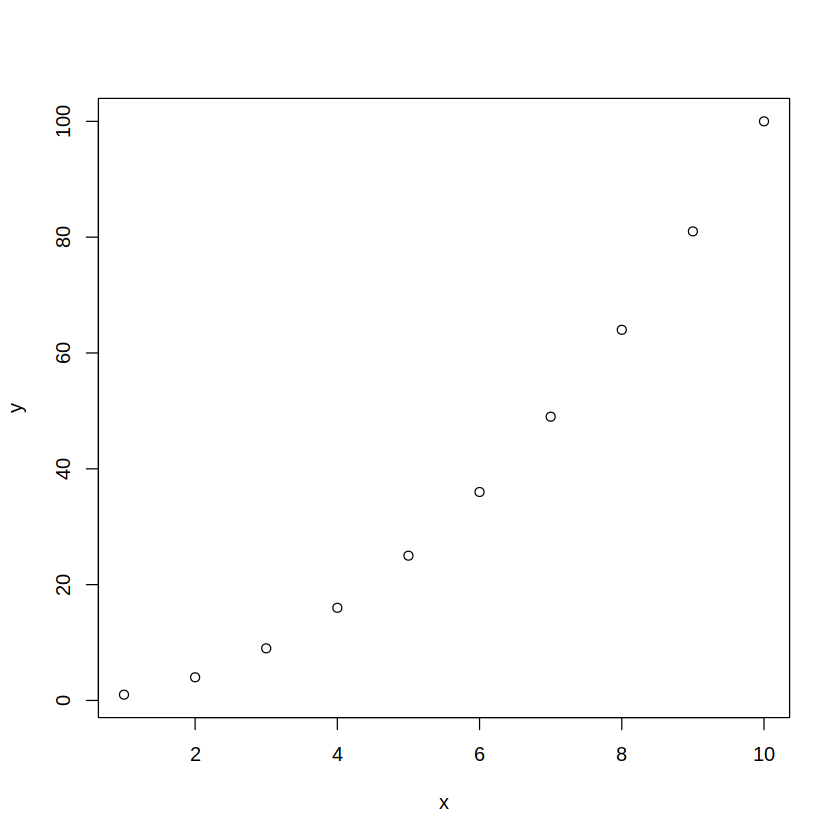

In [193]:
x = 1:10
y = x^2
plot(x, y)

lets work on in-built dataset: `mtcars`

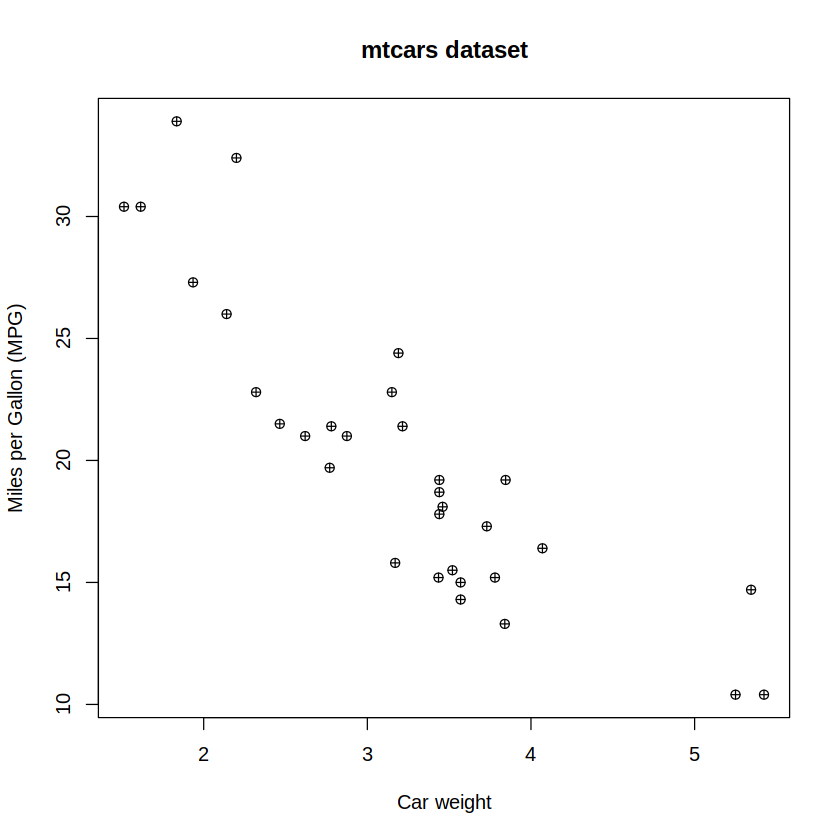

In [200]:
plot(mtcars$wt, mtcars$mpg, 
    main="mtcars dataset",             # Graph label (title)
    xlab="Car weight",                 # X-label..
    ylab="Miles per Gallon (MPG)",     # Y-axis label..
    pch=10)                            # shape of marker. here 19 refers to the filled-circle

### Line Plot

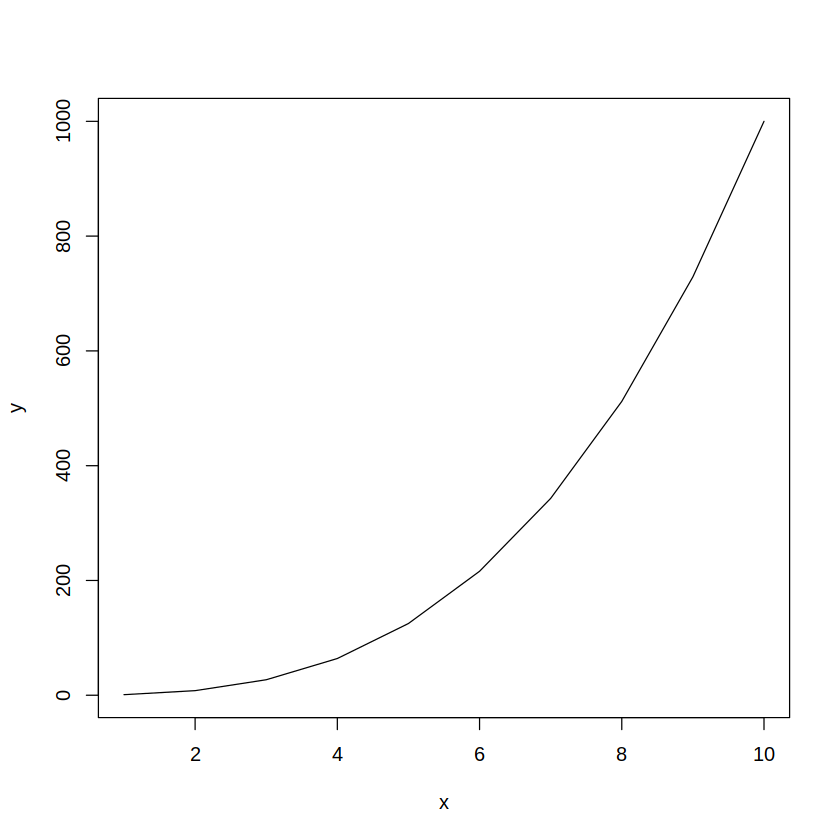

In [206]:
x = 1:10
y = x^3
plot(x, y, type='l')  # Line plot..

### Barplot

```R
    barplot(H, names.arg, xlab, main, names.arg, col)
```
Where:
   * `H`: heights - can be vectors or matrix. (but we'll deal with the vectors for simple..) 
   * `names.arg`: It prints the names under each bar.
   * `xlab` & `ylab`: X-axis label and Y-axis label.
   * `main`: title of the plot
   * `names.arg`: ??
   * `col`: color

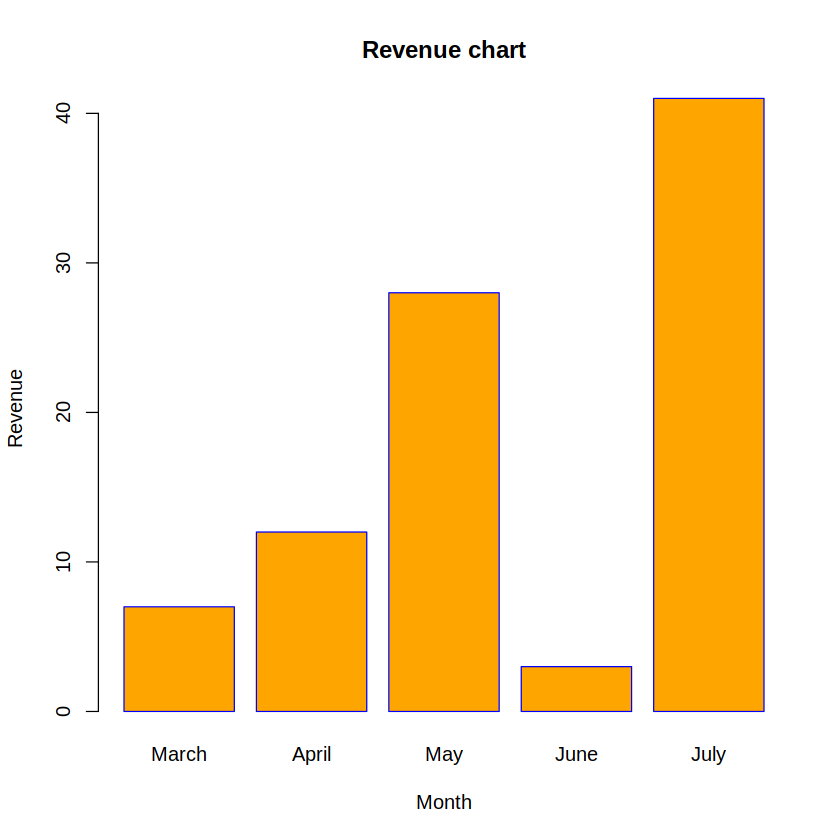

In [219]:
H <- c(7, 12, 28, 3, 41)
M <- c("March", "April", "May", "June", "July")
barplot(H, names.arg=M, xlab="Month", ylab="Revenue", col="orange", main="Revenue chart", border="blue")

In [220]:
par(mfrow=c(2,4))
days <- c("Thur", "Fri", "Sat", "Sun")
sexes <- unique(tips$sex)
for (i in 1:length(sexes)) {
for (j in 1:length(days)) {
currdata <- tips[tips$day == days[j] & tips$sex == sexes[i],]
plot(currdata$total_bill, currdata$tip/currdata$total_bill,
main=paste(days[j], sexes[i], sep=", "), ylim=c(0,0.7), las=1)
}
}

ERROR: Error in unique(tips$sex): object 'tips' not found


### Challenges

* Knowing when to introducye a for loop
* Which columns of the dataframe to be selected.
* The positioning of each graph in the grid..

even though, we could try manage the above, at end we back at
* Less pleasing visuals

This need introduces the `ggplot2` library, which produce good plotting.